# Assignment 7


# Question 1

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import datetime

C:\Users\perusset\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Import data
data = pd.read_csv("data.csv",sep=";")
data['date'] = pd.to_datetime(data['date'])  # First, ensure that "date" is in datetime format
data.head()

,permno,start,ending,date,Rn,shrout,prc,siccd,rf,Rm,...,Hlth,Money,Other,mcap,mcap_l,Rn_f,const,Rn_e,Rm_e,w_m
0,10006,1957-03-01,1984-07-18,1980-02-29,-0.058795,8859.0,38.500,3743.0,0.011347,0.001015,...,-0.057647,-0.061547,-0.027247,341071.500,367648.500,-0.172078,1,-0.070142,-0.010332,0.000491
1,10006,1957-03-01,1984-07-18,1980-03-31,-0.172078,8859.0,31.875,3743.0,0.012542,-0.120224,...,-0.040942,-0.101542,-0.169042,282380.625,341071.500,-0.027451,1,-0.184620,-0.132766,0.000456
2,10006,1957-03-01,1984-07-18,1980-04-30,-0.027451,8859.0,31.000,3743.0,0.007698,0.052287,...,0.035102,0.060602,0.044802,274629.000,282380.625,0.084677,1,-0.035149,0.044589,0.000421
3,10006,1957-03-01,1984-07-18,1980-05-30,0.084677,8859.0,33.000,3743.0,0.005985,0.060091,...,NaN,NaN,NaN,292347.000,274629.000,-0.007576,1,0.078692,0.054106,0.000391
4,10006,1957-03-01,1984-07-18,1980-06-30,-0.007576,8889.0,32.750,3743.0,0.005168,0.037714,...,-0.003068,0.043832,0.048332,291114.750,292347.000,0.091603,1,-0.012744,0.032546,0.000397


# 1.1 Construct Momentum Strategy

Cumulative 12 month past return for each stock:

In [29]:
data=data.sort_values(['permno','date']).reset_index(drop=True)
data['LN_Cret12'] = data.groupby('permno').apply(lambda x: np.log(x.Rn+1).rolling(11,closed='left').sum()).values
data.head(13)

C:\Users\perusset\AppData\Local\Temp\ipykernel_26988\240351223.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['LN_Cret12'] = data.groupby('permno').apply(lambda x: np.log(x.Rn+1).rolling(11,closed='left').sum()).values


,permno,start,ending,date,Rn,shrout,prc,siccd,rf,Rm,...,Rn_f,const,Rn_e,Rm_e,w_m,LN_Cret12,Momentum,w_L,w_S,w_Mom
0,10006,1957-03-01,1984-07-18,1980-02-29,-0.058795,8859.0,38.500,3743.0,0.011347,0.001015,...,-0.172078,1,-0.070142,-0.010332,0.000491,NaN,NaN,NaN,NaN,NaN
1,10006,1957-03-01,1984-07-18,1980-03-31,-0.172078,8859.0,31.875,3743.0,0.012542,-0.120224,...,-0.027451,1,-0.184620,-0.132766,0.000456,NaN,NaN,NaN,NaN,NaN
2,10006,1957-03-01,1984-07-18,1980-04-30,-0.027451,8859.0,31.000,3743.0,0.007698,0.052287,...,0.084677,1,-0.035149,0.044589,0.000421,NaN,NaN,NaN,NaN,NaN
3,10006,1957-03-01,1984-07-18,1980-05-30,0.084677,8859.0,33.000,3743.0,0.005985,0.060091,...,-0.007576,1,0.078692,0.054106,0.000391,NaN,NaN,NaN,NaN,NaN
4,10006,1957-03-01,1984-07-18,1980-06-30,-0.007576,8889.0,32.750,3743.0,0.005168,0.037714,...,0.091603,1,-0.012744,0.032546,0.000397,NaN,NaN,NaN,NaN,NaN
5,10006,1957-03-01,1984-07-18,1980-07-31,0.091603,8889.0,35.750,3743.0,0.006249,0.069438,...,0.059441,1,0.085354,0.063189,0.000385,NaN,NaN,NaN,NaN,NaN
6,10006,1957-03-01,1984-07-18,1980-08-29,0.059441,8889.0,37.250,3743.0,0.007747,0.023554,...,0.144295,1,0.051694,0.015807,0.000394,NaN,NaN,NaN,NaN,NaN
7,10006,1957-03-01,1984-07-18,1980-09-30,0.144295,8922.0,42.625,3743.0,0.008996,0.029498,...,0.000000,1,0.135299,0.020502,0.000408,NaN,NaN,NaN,NaN,NaN
8,10006,1957-03-01,1984-07-18,1980-10-31,0.000000,8922.0,42.625,3743.0,0.009735,0.020095,...,0.120235,1,-0.009735,0.010360,0.000454,NaN,NaN,NaN,NaN,NaN
9,10006,1957-03-01,1984-07-18,1980-11-28,0.120235,8922.0,47.750,3743.0,0.012210,0.104952,...,-0.023560,1,0.108025,0.092742,0.000448,NaN,NaN,NaN,NaN,NaN


Momentum Decile Weights

<DateOffset: months=1>

In [41]:
q = 10
data['Momentum'] = data.groupby('date')['LN_Cret12'].transform(lambda x: pd.qcut(x,q,labels=False, duplicates='drop'))
data['w_L'] = (data['Momentum']==q-1)*data['mcap']
data['w_S'] = (data['Momentum']==0)*data['mcap']
data['w_L'] = data['w_L']/data.groupby(['date'])['w_L'].transform('sum')
data['w_S'] = data['w_S']/data.groupby(['date'])['w_S'].transform('sum')
data['w_Mom'] = data['w_L'] - data['w_S']
Momentum = data.groupby('date').apply(lambda x: np.sum(x['Rn_f']*x['w_Mom'])).reset_index()
Momentum['date'] =  Momentum['date'] + pd.DateOffset(months=1)
Momentum.columns = ['date','Mom_ret']

C:\Users\perusset\AppData\Local\Temp\ipykernel_26988\2978523838.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Momentum = data.groupby('date').apply(lambda x: np.sum(x['Rn_f']*x['w_Mom'])).reset_index()


Momentum Returns since 1980

Momentum Return Annualized:  0.04939893561169254
Momentum Std Annualized:  0.24953254699315436
Momentum Sharpe:  0.19796590147035104


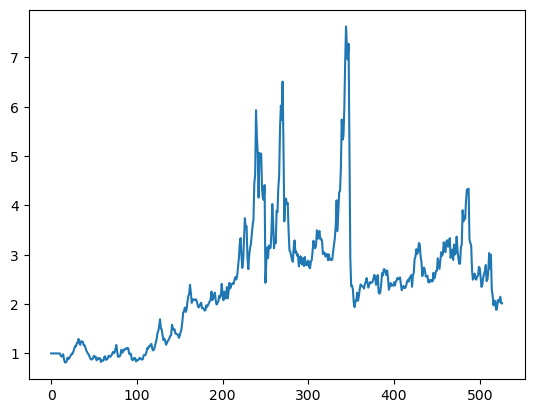

In [42]:
start = '1980-01-01'
print('Momentum Return Annualized: ', (Momentum['Mom_ret'].mean()*12))
print('Momentum Std Annualized: ',Momentum['Mom_ret'].std()*np.sqrt(12))
print('Momentum Sharpe: ',Momentum['Mom_ret'].mean()/Momentum['Mom_ret'].std()*np.sqrt(12))
plt.plot((Momentum['Mom_ret']+1).cumprod())

## 1.2 Observable Factors

In [43]:
Industries =['NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'Chems',
 'BusEq',
 'Telcm',
 'Utils',
 'Shops',
 'Hlth',
 'Money',
 'Other']
# Merge
tmp = pd.merge(Momentum,data[['date','Rm_e']+Industries].drop_duplicates(), on='date',how='left')
tmp['const'] = 1
tmp = tmp.dropna()

# Industry Exposure
import statsmodels.api as sm
RegOLS = sm.OLS(tmp['Mom_ret'], tmp[['const','Rm_e']+Industries]).fit()
print(pd.concat([RegOLS.params,RegOLS.tvalues], axis=1))
print(RegOLS.rsquared)

              0         1
const  0.006845  1.292673
Rm_e   2.815062  3.475013
NoDur  0.121375  0.482097
Durbl -0.234767 -2.252994
Manuf -0.625004 -1.912839
Enrgy -0.211962 -2.068123
Chems -0.166827 -0.678334
BusEq -0.543885 -2.401275
Telcm -0.457033 -2.492547
Utils -0.261753 -1.506680
Shops -0.049427 -0.227503
Hlth   0.173019  0.920018
Money -0.962385 -4.607329
Other -0.013978 -0.043111
0.4238197230799958


 1. Significantly negative Exposure to Financial Services Industry (Money)
 2. Positive Exposure to market factor
 3. Alpha is 0.6% and (almost) statistically significant: Industry factors cannot explain the strategies expected return
 4. R-squared is 42%. Industry factors can only explain one third of the strategy's return variation.

## 1.3 Unobservable Factors

In [44]:
# Compute market beta for each stock
Parameters = data.groupby('permno').apply(lambda x: sm.OLS(x['Rn_e'],x[['const','Rm_e']]).fit().params).reset_index()
Parameters.columns=['permno','alpha','beta_Mkt']
tmp = pd.merge(data[['date','permno','w_Mom','Rn_e','FF_12']], Parameters[['permno','beta_Mkt']],on=['permno'], how='left')
tmp['beta_Mkt'] = tmp['beta_Mkt'].clip(-2,2)

# Industry Exposures as Dummy
tmp[Industries] = pd.get_dummies(tmp['FF_12']).replace({True: 1, False: 0})


C:\Users\perusset\AppData\Local\Temp\ipykernel_26988\2832836079.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Parameters = data.groupby('permno').apply(lambda x: sm.OLS(x['Rn_e'],x[['const','Rm_e']]).fit().params).reset_index()
C:\Users\perusset\AppData\Local\Temp\ipykernel_26988\2832836079.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tmp[Industries] = pd.get_dummies(tmp['FF_12']).replace({True: 1, False: 0})


In [45]:
tmp.head()


,date,permno,w_Mom,Rn_e,FF_12,beta_Mkt,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
0,1980-02-29,10006,NaN,-0.070142,3.0,0.858949,0,0,1,0,0,0,0,0,0,0,0,0
1,1980-03-31,10006,NaN,-0.184620,3.0,0.858949,0,0,1,0,0,0,0,0,0,0,0,0
2,1980-04-30,10006,NaN,-0.035149,3.0,0.858949,0,0,1,0,0,0,0,0,0,0,0,0
3,1980-05-30,10006,NaN,0.078692,3.0,0.858949,0,0,1,0,0,0,0,0,0,0,0,0
4,1980-06-30,10006,NaN,-0.012744,3.0,0.858949,0,0,1,0,0,0,0,0,0,0,0,0


C:\Users\perusset\AppData\Local\Temp\ipykernel_26988\3384407547.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Factors = tmp.groupby(['date']).apply(lambda x: sm.OLS(x['Rn_e'],x[['beta_Mkt']+Industries]).fit().params)
C:\Users\perusset\AppData\Local\Temp\ipykernel_26988\3384407547.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Factors_tstats = tmp.groupby(['date']).apply(lambda x: sm.OLS(x['Rn_e']

                 0         1
beta_Mkt -0.290076  3.617355
NoDur     0.753577  2.178002
Durbl     0.423533  1.540218
Manuf     0.681657  2.039493
Enrgy     0.522051  2.550811
Chems     0.592856  1.703637
BusEq     0.736980  1.940164
Telcm     0.489187  1.717554
Utils     0.663513  2.541698
Shops     0.804040  2.257258
Hlth      0.750292  2.217306
Money     0.779269  2.503056
Other     0.630642  1.930189


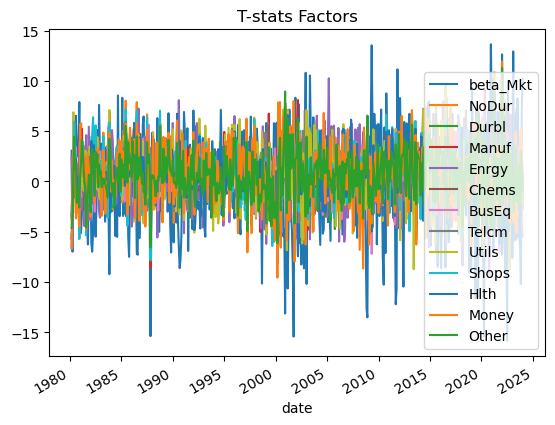

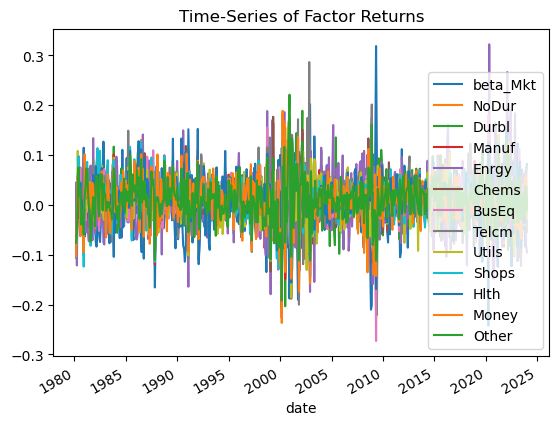

In [22]:

# Estimate Factor
Factors = tmp.groupby(['date']).apply(lambda x: sm.OLS(x['Rn_e'],x[['beta_Mkt']+Industries]).fit().params)

Factors_tstats = tmp.groupby(['date']).apply(lambda x: sm.OLS(x['Rn_e'],x[['beta_Mkt']+Industries]).fit().tvalues)

# Plot T-stats
Factors_tstats.plot(),plt.title('T-stats Factors')
Factors.plot(),plt.title('Time-Series of Factor Returns')
print(pd.concat([Factors_tstats.mean(),np.abs(Factors_tstats).mean()],axis=1))

1. The risk premium associated with different industries seems to be strongly time-varying: Neither the industry factors, nor the market factor have a constant negative or positive risk premium attached to it. 
2. The average absolute t-statistic of the market factor high (>2.58), which suggests that exposure to the market factor is an important determinant of the cross-section of returns. Many industry factors are significant drivers of the cross-section of returns in some (!) months. However, the sign of the associated return premium varies strongly over time and the coefficient is often insignificant.
3. Conclusion: Estimating a constant coefficient of any strategy's return to the different industry factors is likely not going to be estimating risk exposure adequately. Exposure to the factors is likely strongly time-varying as the industry factors' ability to explain the cross-sectional variation of returns varies considerably through time. 

 ## 1.4a Compute Factor Exposures from Weights

In [23]:
Exposures = tmp[['date','w_Mom','beta_Mkt'] + Industries].copy()
Exposures[Industries] = Exposures[Industries]*Exposures['w_Mom'].to_numpy()[:,np.newaxis]
Exposures['beta_Mkt'] = Exposures['w_Mom'] * Exposures['beta_Mkt']
Exposures = Exposures.groupby('date')[['beta_Mkt'] + Industries].sum()

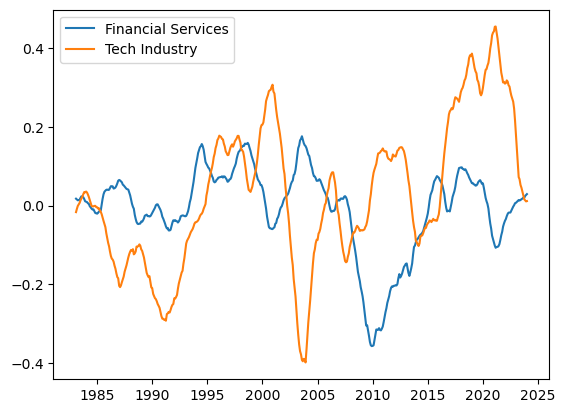

In [24]:
# Plot Exposure to all industries
''' plt.plot(Exposures)
plt.legend(Exposures.columns)
plt.show()'''


# Plot Exposure to Tech and Finance
plt.plot(Exposures['Money'].rolling(36).mean())
plt.plot(Exposures['BusEq'].rolling(36).mean())
plt.legend(['Financial Services','Tech Industry'])
plt.show()

The exposure of the momentum strategy to the different industries is strongly time varying! For example in the lead-up to the dotcom bubble the momentum strategy had a strong positive exposure to tech stocks. When dotcom stocks deteriorated, the momentum strategy was negatively exposed to the tech industry.

## 1.4b Create Industry Hedge Portfolio

In [46]:
# Hedge Portfolio Return
Hedge_Return = Factors * Exposures.rename(columns={'beta_Mkt':'Rm_e'})
Hedge_Return = Hedge_Return.sum(axis=1)

Mom_hedge = Momentum.set_index('date')-Hedge_Return.to_numpy()[:,np.newaxis]
print('Momentum-Hedged Return: ', Mom_hedge.mean()*12)
print('Momentum-Hedged Std: ', Mom_hedge.std()*np.sqrt(12))
print('Momentum-Hedged Sharpe: ', Mom_hedge.mean()/Mom_hedge.std()*np.sqrt(12))

Momentum-Hedged Return:  Mom_ret    0.021242
dtype: float64
Momentum-Hedged Std:  Mom_ret    0.266682
dtype: float64
Momentum-Hedged Sharpe:  Mom_ret    0.079654
dtype: float64


Because the industry factors carry a slight risk-premium, hedging away industry exposure of the momentum strategy comes at a cost: Lower expected returns, which decreases the sharpe ratio.

# Q2. Open Questions 

a) The CAPM implies that stocks with the same expected return cannot have the same beta.

-> False. The CAPM implies precisely that.


b) The CAPM implies that two securities with different levels of idiosyncratic risk must have different expected returns, otherwise, no agent would choose to hold the security with higher idiosyncratic risk.

-> False. Idiosyncratic risk is not priced.


c) According to the CAPM standard deviation is the right measure of risk for all assets? for some assets?

-> False. The beta is the right measure of risk. For efficient portfolios, the standard deviation is proportional to the beta and thus also a good measure of risk.


d) According to the CAPM beta is the right measure of risk for all assets? for some assets?

-> True. The beta is the right measure of risk for all assets. 



e) Suppose an asset has a positive alpha (i.e., it is above the security market line). Is this asset under or over-valued? Should you invest all your wealth in this asset if you are a mean-variance investor?

-> With a positive alpha, the asset is undervalued (the return is higher than it should be, i.e. the current price is lower than it should be). In general you should not invest all your wealth in that asset, since the return is risky.



f) Suppose the CAPM holds in an economy with 2 risky assets that have equal market capitalization. Can their idiosyncratic risk be uncorrelated?

-> Only if their returns are perfectly correlated (then their returns are also perfectly correlated with the market and the stocks have no idiosyncratic risk).

